In [112]:
#Importing libraries
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
import numpy as np
from itertools import combinations, groupby
from collections import Counter
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sb
import itertools
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Understanding data

Load Dataset

In [113]:
#Load into pandas dataframe
try:
    df = pd.read_excel("Online_retail_Data.xlsx")
    print("Loading Dataset Successful")
except:
    print("Loading Dataset unsuccessful. Please check if file is present in same folder as this program with file name Online_retail_Data.xlsx")

Loading Dataset Successful


In [114]:
#Checking count of rows and columns in dataset
rows, columns = df.shape

print("Row count:",rows,"\nColumn count:",columns)

Row count: 540509 
Column count: 8


In [115]:
print("Available features with data type are:\n")
print(df.dtypes)

Available features with data type are:

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [116]:
#Describing features
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


InvoiceNo - Unique number assigned to a shipment for billing purpose

StockCode - Helps track the item for inventory

Description - Product name

Quantity - Amount purchased

InvoiceDate - Date and time of purchase

UnitPrice - Cost of product

CustomerID - Unique id for customer

Country - Contry of purchase

# Data cleaning

In [117]:
#Check for null values in our columns
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134130
Country             0
dtype: int64


There can be two things donwe with null values:

1. Remove
2. Imputation

In our case the columns customerID and Description have null values. But, according to me these values can not be imputed because they are independent and not continuous.

So we will remove them.

In [118]:
#Removing null valued rows
df = df[~((df['CustomerID'].isnull()) | (df['Description'].isnull()))]
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [119]:
#Removing data with quantity value less than 0
df = df[~(df['Quantity']<=0)]

In [120]:
#Removing data with nan Descripton values
df = df[~((df['Description'] == 'nan') | (df['Description'] == 'NAN'))]

# Feature Engineering

In [121]:
#Creating new useful features

#Total cost of purchase
df['total_cost'] = df['Quantity'] * df['UnitPrice']

#Purchase made on hour of day
df['hour'] = pd.DatetimeIndex(df['InvoiceDate']).hour
df['day_of_week'] = pd.DatetimeIndex(df['InvoiceDate']).dayofweek
df['month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,hour,day_of_week,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,2,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,2,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,2010


# Time for some insights

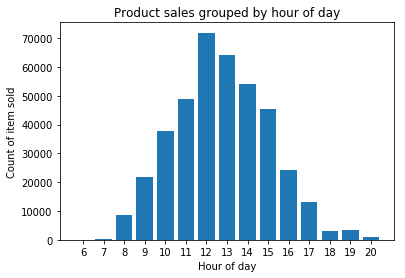

In [122]:
#Product sales grouped by hour of day

check = pd.DataFrame()
check['hour'] = df['hour']
check['count'] = df['InvoiceNo']

display = check.groupby('hour',as_index=False)['count'].count()

#Plotting bar chart
plt.bar(display['hour'],display['count'])
plt.xlabel('Hour of day')
plt.ylabel('Count of item sold')
plt.xticks(display['hour'])
plt.title('Product sales grouped by hour of day')
plt.show()

Looks like highest number of product sales are made in the afternoon 12 p.m. and sales fall after the evening till morning 6 a.m. This may be because people make most purchases in the afternoon when they have free time.

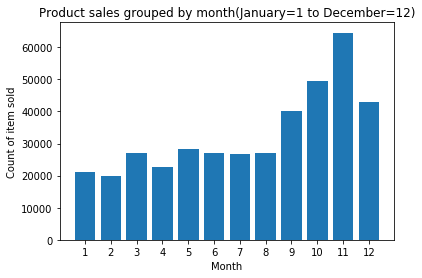

In [123]:
#Product sales grouped by month

check['month'] = df['month']

display = check.groupby('month',as_index=False)['count'].count()

#Plotting bar chart
plt.bar(display['month'],display['count'])
plt.xlabel('Month')
plt.ylabel('Count of item sold')
plt.xticks(display['month'])
plt.title('Product sales grouped by month(January=1 to December=12)')
plt.show()

As seen above, the highest count of item were sold in  the month of November. This may be due to there is some kind of promotional or seasonal sale on the products in month of November.

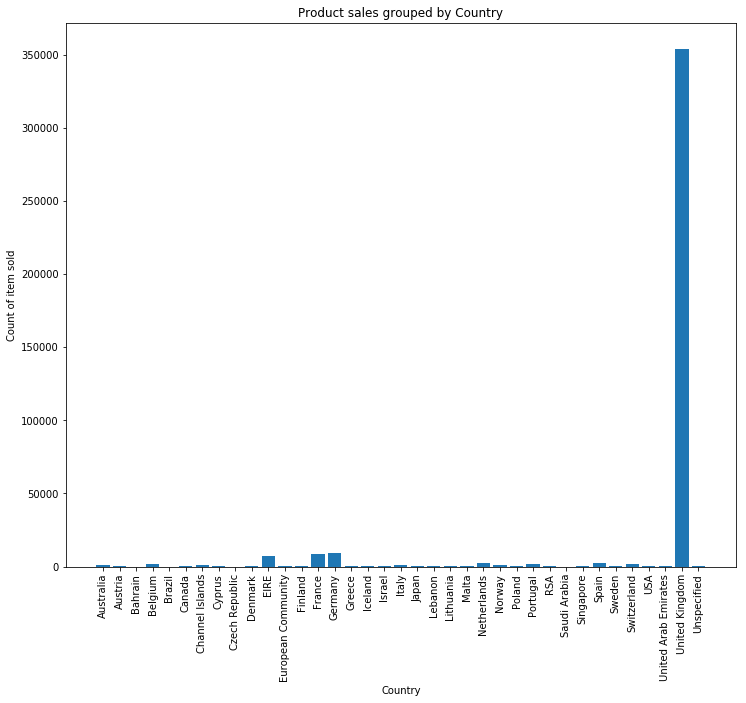

In [124]:
#Product sales grouped by country

check['Country'] = df['Country']

display = check.groupby('Country',as_index=False)['count'].count()

#Plotting bar chart
plt.figure(figsize=(12,10))
plt.bar(display['Country'],display['count'])
plt.xlabel('Country')
plt.ylabel('Count of item sold')
plt.xticks(display['Country'], rotation='vertical')
plt.title('Product sales grouped by Country')
plt.show()

From above figure we can infer that ABC company is United Kingdom based company or it has biggest market in UK.

In [125]:
#Top selling product by average quantity sold

check['Description'] = df['Description']
check['Quantity'] = df['Quantity']

display = check.groupby('Description',as_index=False)['Quantity'].mean()

display.sort_values(by=['Quantity'],ascending=False,inplace=True)


In [126]:
display.head(10)

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995.000000
3423,TEA TIME TEA TOWELS,1300.000000
1398,GIRLS ALPHABET IRON ON PATCHES,520.000000
1992,MEDIUM CERAMIC TOP STORAGE JAR,393.515152
246,ASSTD DESIGN 3D PAPER STICKERS,380.611111
1155,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333
3135,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000
531,BOYS ALPHABET IRON ON PATCHES,249.600000
3242,SMALL CHINESE STYLE SCISSOR,246.814815
2082,MISELTOE HEART WREATH CREAM,240.000000


In [127]:
#Top selling product by average revenue earned

#check['Description'] = df['Description']
check['total_cost'] = df['total_cost']

display = check.groupby('Description',as_index=False)['total_cost'].mean()

display.sort_values(by=['total_cost'],ascending=False,inplace=True)

In [128]:
display.head(10)

,Description,total_cost
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.600000
2395,PICNIC BASKET WICKER 60 PIECES,19809.750000
3423,TEA TIME TEA TOWELS,3022.500000
2082,MISELTOE HEART WREATH CREAM,996.000000
1036,DOTCOM POSTAGE,744.147500
3135,SET/5 RED SPOTTY LID GLASS BOWLS,734.400000
1539,HALL CABINET WITH 3 DRAWERS,625.882500
2616,POTTING SHED CANDLE CITRONELLA,625.410000
3670,WEEKEND BAG VINTAGE ROSE PAISLEY,527.850000
3527,UTILTY CABINET WITH HOOKS,435.048333


So we have now collected different kinds of insights about our data which can be used in future work.

# Recommender system (Market basket analysis)

In [129]:
#Converting dataframe to series to perform analysis
orders = df.set_index('InvoiceNo')['StockCode'].rename('item_id')
print(orders.head(10))
type(orders)

InvoiceNo
536365    85123A
536365     71053
536365    84406B
536365    84029G
536365    84029E
536365     22752
536365     21730
536366     22633
536366     22632
536367     84879
Name: item_id, dtype: object


pandas.core.series.Series

In [130]:
#Lets check out some order statistics
print('Dimension:',orders.shape[0],'\nUnique orders:',len(orders.index.unique()),
      '\nUnique items:',len(orders.value_counts()))

Dimension: 397478 
Unique orders: 18510 
Unique items: 3665


In [131]:
#Building functions for association rule

#Return count for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else:
        return pd.Series(Counter(iterable)).rename("freq")


#Return count of unique orders
def order_count(order_item):
    return len(set(order_item.index))


#To handle big dataset, I am using generator to give item pairs
def get_item_pairs(order_item):
    order_item = order_item.reset_index().as_matrix()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}),
                       left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}),
                       left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [132]:
#Function for trigerring the rule mining

def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [133]:
#Running the model
rules = association_rules(orders,0.01)

Starting order_item:                 397478
Items with support >= 0.01:            3498
Remaining order_item:                397311
Remaining orders with 2+ items:       17116
Remaining order_item:                395920
Item pairs:                         3228552
Item pairs with support >= 0.01:    1715074



In [134]:
#lets display the results

#Replacing item id with item name
item_name = pd.DataFrame()
item_name['item_id'] = df['StockCode']
item_name['item_name'] = df['Description']

item_name.drop_duplicates(inplace=True)

#replacing item id with item names
final_result = merge_item_name(rules,item_name).sort_values('lift',ascending=False)

#Filtering results based on lift value
final_result = final_result[(final_result['lift'] > 1)]

In [135]:
#Function for getting the results

def item_bought_together(key):
    return final_result[final_result['itemA']==key].head(10)

In [136]:
#Change the key that is item name to see items bought together

result = item_bought_together('ENVELOPE 50 ROMANTIC IMAGES')
result

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
2481,ENVELOPE 50 ROMANTIC IMAGES,VINTAGE NOTEBOOK BEAUTY GIRL,2,0.011685,3,0.017527,2,0.011685,0.666667,1.000000,57.053333
2487,ENVELOPE 50 ROMANTIC IMAGES,LA PALMIERA WALL THERMOMETER,2,0.011685,3,0.017527,10,0.058425,0.666667,0.200000,11.410667
2525,ENVELOPE 50 ROMANTIC IMAGES,ENGLISH ROSE NOTEBOOK A6 SIZE,2,0.011685,3,0.017527,20,0.116850,0.666667,0.100000,5.705333
2723,ENVELOPE 50 ROMANTIC IMAGES,SALLE DE BAIN HOOK,4,0.023370,3,0.017527,65,0.379762,1.333333,0.061538,3.510974
3104,ENVELOPE 50 ROMANTIC IMAGES,DINOSAUR HEIGHT CHART STICKER SET,2,0.011685,3,0.017527,35,0.204487,0.666667,0.057143,3.260190
3342,ENVELOPE 50 ROMANTIC IMAGES,MONEY BOX BISCUITS DESIGN,2,0.011685,3,0.017527,45,0.262912,0.666667,0.044444,2.535704
3708,ENVELOPE 50 ROMANTIC IMAGES,FELTCRAFT DOLL MARIA,2,0.011685,3,0.017527,47,0.274597,0.666667,0.042553,2.427801
4018,ENVELOPE 50 ROMANTIC IMAGES,MONEY BOX POCKET MONEY DESIGN,2,0.011685,3,0.017527,56,0.327179,0.666667,0.035714,2.037619
4400,ENVELOPE 50 ROMANTIC IMAGES,MONEY BOX KINGS CHOICE DESIGN,2,0.011685,3,0.017527,64,0.373919,0.666667,0.031250,1.782917
5065,ENVELOPE 50 ROMANTIC IMAGES,ORGANISER WOOD ANTIQUE WHITE,2,0.011685,3,0.017527,75,0.438186,0.666667,0.026667,1.521422


# Time of time series prediction of top 10 products


Assuming that the company ABC ranks top products based on first quantity of product sold and the frequency of purchase for the same

In [137]:
#Adding week column to dataset
df['week'] = pd.DatetimeIndex(df['InvoiceDate']).week

In [138]:
#We will first filter our data to keep only top 10 products

#Top selling product by quantity of product sold

check['Description'] = df['Description']
check['Quantity'] = df['Quantity']
check['StockCode'] = df['StockCode']
check['week'] = df['week']

display = check.groupby(['Description'],as_index=False).agg({'Quantity':sum, 'StockCode':"count"})
display.sort_values(by=['Quantity'],ascending=False,inplace=True)

In [139]:
#Top selling product by quantity of product sold and frequency of purchase
display.sort_values(by=['StockCode'],ascending=False,inplace=True)

In [140]:
display['Description'].head(10)

3698    WHITE HANGING HEART T-LIGHT HOLDER
2767              REGENCY CAKESTAND 3 TIER
1762               JUMBO BAG RED RETROSPOT
216          ASSORTED COLOUR BIRD ORNAMENT
2345                         PARTY BUNTING
1943               LUNCH BAG RED RETROSPOT
3001     SET OF 3 CAKE TINS PANTRY DESIGN 
1935               LUNCH BAG  BLACK SKULL.
2611                               POSTAGE
2269       PACK OF 72 RETROSPOT CAKE CASES
Name: Description, dtype: object

In [141]:
df = df[(df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER') | 
       (df['Description'] == 'REGENCY CAKESTAND 3 TIER') |
       (df['Description'] == 'JUMBO BAG RED RETROSPOT') |
       (df['Description'] == 'ASSORTED COLOUR BIRD ORNAMENT') |
       (df['Description'] == 'PARTY BUNTING') |
       (df['Description'] == 'LUNCH BAG RED RETROSPOT') |
       (df['Description'] == 'SET OF 3 CAKE TINS PANTRY DESIGN ') |
       (df['Description'] == 'LUNCH BAG  BLACK SKULL.') |
       (df['Description'] == 'POSTAGE') |
       (df['Description'] == 'PACK OF 72 RETROSPOT CAKE CASES')]

We don't need all features for our predictions so lets get rid of them and keep what is required

In [142]:
#creating new data frame with only required features
ts  = pd.DataFrame()
ts['Description'] = df['Description']
ts['Quantity'] = df['Quantity']
ts['InvoiceDate'] = df['InvoiceDate'].dt.date
ts['InvoiceDate'] = pd.to_datetime(ts['InvoiceDate'])
ts['month'] = df['month']
ts['week'] = df['week']


In [143]:
#For first product
#product = 'LUNCH BAG RED RETROSPOT'
def building_data(product):
    
    p1 = pd.DataFrame()
    p1['InvoiceDate'] = ts[ts['Description'] == product].InvoiceDate
    p1['Quantity'] = ts[ts['Description'] == product].Quantity
    p1['month'] = ts[ts['Description'] == product].month
    p1['week'] = ts[ts['Description'] == product].week

    p1 = p1.groupby('InvoiceDate')['Quantity'].sum().reset_index()


    #setting invoice date as index
    indexed_p1 = p1.set_index(['InvoiceDate'])

    #Resampling our data to weekly frequency and dropping null
    y = indexed_p1['Quantity'].resample('W').mean()
    y = y.dropna()
    
    #Checking size for train test split
    size = y.shape[0]
    
    print('data built')
    return y

In [144]:
def plot_data(product_to_plot):
    
    #Plotting product quantity sold weekly
    product_to_plot.plot(figsize=(15,6))
    plt.xlabel("Date sampled weekly")
    plt.ylabel("Average quantity sold")
    plt.title("Quantity of product sold weekly")
    plt.show()


    #Performing time-series decomposition to check trend,seasonility and noise

    from pylab import rcParams
    rcParams['figure.figsize'] = 18,8

    decomposition = sm.tsa.seasonal_decompose(product_to_plot, freq=7, model='additive')
    fig= decomposition.plot()
    plt.show()


# Implementing SARIMAX model

In [145]:
def sarimax(product_data,size):
    # generating parameter combinations
    #final_results = []
    
    #Train and test splitting
    train_size = round(size * (80/100))
    #print('Train size:',train_size)
    test_size = (size - train_size)+1
    #print('Test size:',test_size)

    train = pd.DataFrame()
    test = pd.DataFrame()

    train = product_data.head(train_size)
    test = product_data.tail(test_size)
    

    p=d=q=range(0,2)
    pdq = list(itertools.product(p,d,q))
    seasonal_pdq = [(x[0],x[1],x[2],6)
    for x in list(itertools.product(p,d,q))]
    # using param combinations to find best RMSE
    RMSE_list = pd.DataFrame({}, columns=['param','param_seasonal','RMSE'])
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
            #Running the model
                mod = sm.tsa.statespace.SARIMAX(train,order=param,seasonal_order = param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
                results = mod.fit()
                output = results.predict(start=train_size+1,end=train_size+test_size)
                #Calculating error for different model parameters
                rmse = sqrt(mean_squared_error(test, output))
                #print(rmse)
                temp = pd.DataFrame([[param,param_seasonal,rmse]], columns=['param','param_seasonal', 'RMSE'])
                RMSE_list = RMSE_list.append(temp, ignore_index=True)
                del temp
            except:
                continue
    m = np.amin(RMSE_list['RMSE'].values) # finding the lowest error value
    l = RMSE_list['RMSE'].tolist().index(m) # extracting the index of lowest error value
    minimum_rmse = RMSE_list.iloc[l,:] # Storing the final selected model parameters with lowest RMSE
    #print('Lowest rmse:',minimum_rmse)
    # Running the model with finalized parameters
    print('Predicting weekly quantity required.....\n')
    mod = sm.tsa.statespace.SARIMAX(product_data,order=minimum_rmse['param'],seasonal_order=minimum_rmse['param_seasonal'],enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    final_p = results.predict(start=size+1,end=size+12)
    final_p[final_p<0] = 0
    print(final_p)
    print('-------------------------------------------------------------------------------')
    return final_p


# Driver code for time series prediction

In [146]:
#Checking if we only have the data of top 10 products
input_list = df['Description'].unique()

In [147]:
for i in input_list:
    print('Performing prediction for: ',i)
    prod = building_data(i)
    print('Implementing model....')
    sarimax(prod,size).head(12)

Performing prediction for:  WHITE HANGING HEART T-LIGHT HOLDER
data built
Implementing model....
Predicting weekly quantity required.....

54    125.611228
55    219.690038
56    146.831746
57    130.907781
58    138.253675
59    204.569434
60    123.172920
61    219.650830
62    145.572397
63    130.268975
64    137.299272
65    203.775537
dtype: float64
-------------------------------------------------------------------------------
Performing prediction for:  ASSORTED COLOUR BIRD ORNAMENT
data built
Implementing model....
Predicting weekly quantity required.....

54    174.365024
55    177.218393
56    180.118455
57    183.065975
58    186.061729
59    189.106507
60    192.201110
61    195.346355
62    198.543069
63    201.792096
64    205.094290
65    208.450523
dtype: float64
-------------------------------------------------------------------------------
Performing prediction for:  POSTAGE
data built
Implementing model....
Predicting weekly quantity required.....

54    17.990654
5

# Drivercode to plot data and its seasonal decomposition 

data built
Plotting data for : ASSORTED COLOUR BIRD ORNAMENT


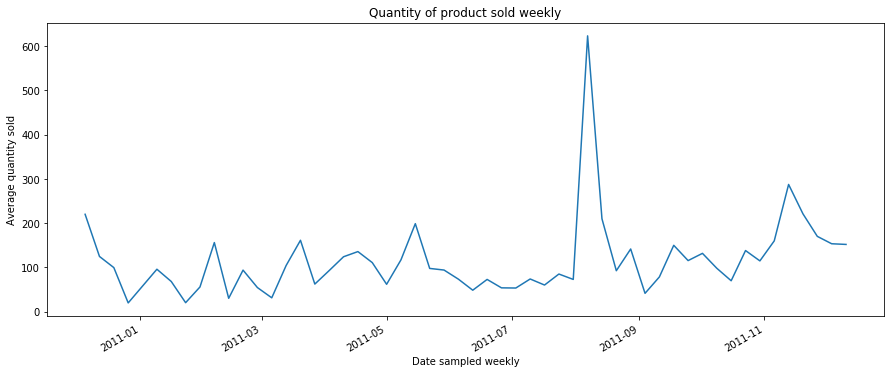

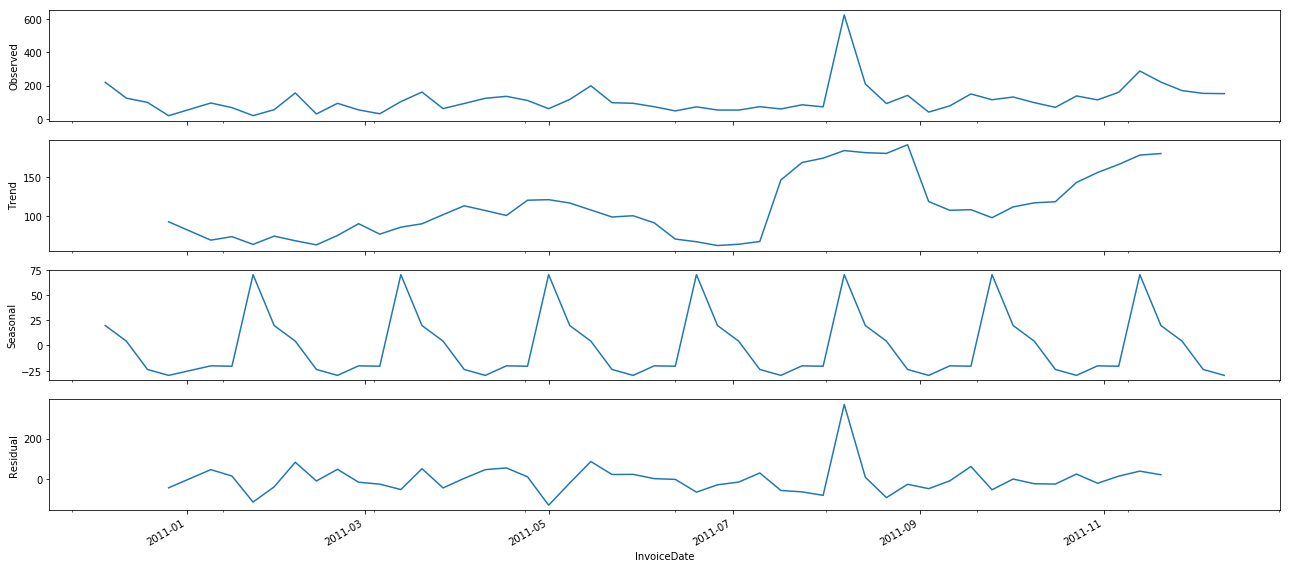

In [148]:
#Get data plotted for specific product, Just key in the value for input_list
plot_this = building_data(input_list[1])
print('Plotting data for :',input_list[1])
plot_data(plot_this)